## **Exploratory Data Analysis(EDA) of Energy Data:**<br>
the major focus of this will be on EDA where we extract meaning/information from data using plots and report important insights about data which is a fuel quality data from Fedral Energy Regulation Commission which is provided by the United States Energy Information Administration. This part is more about **data analysis** and **fuel usage intelligence(BI)**.

### Data Description

   Title: Energy Data <br>
**Number of Instances:** 29523<br>
**Number of Attributes:** 11 including the class attribute<br>
**Attribute Information:**
    1.  Record_id: record_id           continuous              
    2.  utility_id_ferc1               continuos
    3.  report_year                    multi-valued discrete 
    4.  plant_name_ferc1               multi-valued discrete
    5.  fuel_type_code_pudl            multi-valued discrete
    6.  fuel_unit                      multi-valued discrete
    7.  fuel_qty_burned                continuous
    8.  fuel_mmbtu_per_unit            continuous
    9.  fuel_cost_per_unit_burned      continuous
    10. fuel_cost_per_unit_delivered   continuous
    11. fuel_cost_per_mmbtu            continuous
    
   **Note** : mmbtu means measure of energy delivered per unit
    
   All the attributes are self-explanatory.

This data is not complex and is good for analysis as it has a nice blend of both categorical and numerical attributes.


These are the main aspects I will cover in this Analysis

1. **Preprocess the data**, this includes dealing with missing values, duplicate data if any and then align the data.
2. **EDA on categorical attributes**, this includes analysing their distributions and relations with other cat. attributes.
3. **EDA on numerical attributes**, this includes analysing their distributions and relations with other num. attributes.
4. Then we will analyse the **relation b/w num. & cat. attributes**.

I make use of **seaborn** heavily throughout the notebook

In [1]:
import numpy as np    # linear algebra
import pandas as pd   # data processing/feature engineering
import matplotlib.pyplot as plt       # Data visualization
import seaborn as sns                 # Enhanced Data Visualization

%matplotlib inline

In [2]:
data = pd.read_csv('downloaded.csv',index_col=False )

In [3]:
data.head()

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489.0,16.590,18.59,18.53,1.121
1,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945.0,16.592,18.58,18.53,1.120
2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683.0,24.130,39.72,38.12,1.650
3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484.0,23.950,47.21,45.99,1.970
4,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,mcf,40533.0,1.000,2.77,2.77,2.570


In [4]:
# so now the data is in rectangular form with 29523 entries each having 11 distinct properties
data.shape

(29523, 11)

In [5]:
# we now describe the properties of this dataframe like column datatype etc.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29523 entries, 0 to 29522
Data columns (total 11 columns):
record_id                       29523 non-null object
utility_id_ferc1                29523 non-null int64
report_year                     29523 non-null int64
plant_name_ferc1                29523 non-null object
fuel_type_code_pudl             29523 non-null object
fuel_unit                       29343 non-null object
fuel_qty_burned                 29523 non-null float64
fuel_mmbtu_per_unit             29523 non-null float64
fuel_cost_per_unit_burned       29523 non-null float64
fuel_cost_per_unit_delivered    29523 non-null float64
fuel_cost_per_mmbtu             29523 non-null float64
dtypes: float64(5), int64(2), object(4)
memory usage: 2.5+ MB


In [6]:
data.describe()

,utility_id_ferc1,report_year,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
count,29523.000000,29523.000000,2.952300e+04,29523.000000,29523.000000,2.952300e+04,29523.000000
mean,118.601836,2005.806050,2.622119e+06,8.492111,208.649031,9.175704e+02,19.304354
std,74.178353,7.025483,9.118004e+06,10.600220,2854.490090,6.877593e+04,2091.540939
min,1.000000,1994.000000,1.000000e+00,0.000001,-276.080000,-8.749370e+02,-41.501000
25%,55.000000,2000.000000,1.381700e+04,1.024000,5.207000,3.778500e+00,1.940000
50%,122.000000,2006.000000,2.533220e+05,5.762694,26.000000,1.737100e+01,4.127000
75%,176.000000,2012.000000,1.424034e+06,17.006000,47.113000,4.213700e+01,7.745000
max,514.000000,2018.000000,5.558942e+08,341.260000,139358.000000,7.964521e+06,359278.000000


In [7]:
#To check for num values within data

data.isnull().sum()

record_id                         0
utility_id_ferc1                  0
report_year                       0
plant_name_ferc1                  0
fuel_type_code_pudl               0
fuel_unit                       180
fuel_qty_burned                   0
fuel_mmbtu_per_unit               0
fuel_cost_per_unit_burned         0
fuel_cost_per_unit_delivered      0
fuel_cost_per_mmbtu               0
dtype: int64

we realise that there are 180 null values in the fuel_unit column

We now make two distinct list for categorical and numerical column names as the analysis differ for both the types. For that we introspect the datatypes of each column and if it is of type `object` then it's categorical and else numerical.

We will use these two lists heavily throughout the analysis.

In [8]:
cats = list(data.select_dtypes(include=['object']).columns)
nums = list(data.select_dtypes(exclude=['object']).columns)
print(f'categorical variables:  {cats}')
print(f'numerical variables:  {nums}')

categorical variables:  ['record_id', 'plant_name_ferc1', 'fuel_type_code_pudl', 'fuel_unit']
numerical variables:  ['utility_id_ferc1', 'report_year', 'fuel_qty_burned', 'fuel_mmbtu_per_unit', 'fuel_cost_per_unit_burned', 'fuel_cost_per_unit_delivered', 'fuel_cost_per_mmbtu']


In [9]:
# let's inspect how many unique values are there in each column.
data.nunique(axis=0)

record_id                       29523
utility_id_ferc1                  185
report_year                        25
plant_name_ferc1                 2315
fuel_type_code_pudl                 6
fuel_unit                           9
fuel_qty_burned                 26432
fuel_mmbtu_per_unit             11227
fuel_cost_per_unit_burned       19416
fuel_cost_per_unit_delivered    16675
fuel_cost_per_mmbtu             12605
dtype: int64

    The categorical variables  as expected have few unique values while the numerical have much as expected

In [10]:
#To check for num values within data

missing_values=data.isnull().sum()
missing_values

record_id                         0
utility_id_ferc1                  0
report_year                       0
plant_name_ferc1                  0
fuel_type_code_pudl               0
fuel_unit                       180
fuel_qty_burned                   0
fuel_mmbtu_per_unit               0
fuel_cost_per_unit_burned         0
fuel_cost_per_unit_delivered      0
fuel_cost_per_mmbtu               0
dtype: int64

#### How to handle missing values

Missing values are values that are not recorded during data collection. They are mostly not provided, left out due to errors, 
too difficult to measure. Missing values may can be very important to models and as such there exist numerous ways and
techniques to handle them. Let's go over some of these techniques. 

The choice of handling missing values is dependent on the type of features. For categorical features, you can do things like:

1. Mode filling: Fill missing values with the most popular/frequent/modal class.
2. Temporal filling (forward or backward fill): Fill missing values with the preceding value (top-down) or with the succeeding value (bottom-up).
3. Encoding and fill: In this method, you can encode the values using different strategies and the fill with either the mean, mode or the median. 

In [11]:
# let's print these 180 `nan` containing rows 
data[data.isnull().any(axis=1)].head()

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
66,f1_fuel_1994_12_9_3_13,9,1994,mickleton,oil,NaN,3547.0,5.606160,41.930,41.77,7.480
152,f1_fuel_1994_12_8_1_14,8,1994,ar nuclear one,nuclear,NaN,43461380.0,3.412600,1.654,0.00,0.485
277,f1_fuel_1994_12_74_0_3,74,1994,perry k & w,other,NaN,2654942.0,0.100000,0.044,0.00,0.440
626,f1_fuel_1994_12_117_0_1,117,1994,nine mile unit 1,nuclear,NaN,401216.0,0.127467,78.446,0.00,0.615
627,f1_fuel_1994_12_117_0_4,117,1994,nine mile unit 2,nuclear,NaN,313736.0,0.119756,57.534,0.00,0.480


In [12]:
# nan rows proportion in data
180 / len(data)

0.00609694136774718

In [13]:
total_cells = np.product(data.shape)
total_missing = missing_values.sum()

(total_missing/total_cells) * 100

0.05542673970679255

        So  the fuel_unit has 180 null values and this just 0.6% of the data we can just go ahead to drop the nan values.
        This will just remove 5.5% of our dataframe which is just pretty low, so it wont really affect our data

<sup>Note: If the nan-row proportion is large enough then we won't drop it but instead impute missing values.<sup>

In [14]:
# for now remove all nan rows as they are just 0.6%
data = data[~data.isnull().any(axis=1)]
data.reset_index(inplace=True)
data.drop('index', inplace=True, axis=1)
data.shape

(29343, 11)

In [15]:
# find total duplicate entries and drop them if any
print(f'total duplicate rows: {data.duplicated().sum()}')

# drop duplicate rows if any
data= data[~data.duplicated()]
data.shape

total duplicate rows: 0


(29343, 11)

In [16]:
# before we move ahead it's a good practice to group all variables together having same type.
data = pd.concat((data[cats], data[nums]), axis=1)
data.head()

,record_id,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,utility_id_ferc1,report_year,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,f1_fuel_1994_12_1_0_7,rockport,coal,ton,1,1994,5377489.0,16.590,18.59,18.53,1.121
1,f1_fuel_1994_12_1_0_10,rockport total plant,coal,ton,1,1994,10486945.0,16.592,18.58,18.53,1.120
2,f1_fuel_1994_12_2_0_1,gorgas,coal,ton,2,1994,2978683.0,24.130,39.72,38.12,1.650
3,f1_fuel_1994_12_2_0_7,barry,coal,ton,2,1994,3739484.0,23.950,47.21,45.99,1.970
4,f1_fuel_1994_12_2_0_10,chickasaw,gas,mcf,2,1994,40533.0,1.000,2.77,2.77,2.570


In [17]:
num_rows, num_cols = data.shape

In [18]:
# save this cleaned df to csv
data.to_csv('Energy_cleaned.csv', index=False)

### Analysis on Categorical Attributes

Our analysis includes both descriptive stats and EDA.

In [19]:
# let's import the cleaned version of Energy file although no need here because we already updated df
data = pd.read_csv("Energy_cleaned.csv")

In [20]:
print(f'categorical variables:  {cats}')

categorical variables:  ['record_id', 'plant_name_ferc1', 'fuel_type_code_pudl', 'fuel_unit']


     We will first slice out the categorical columns from original dataframe and then do analysis on it keeping the original data untou-ched, and at the end incorporate needed changes in our original dataframe, we might also need to drop the record_id because it is more of an index and will not be needed for our visualization.

In [21]:
data_cat = data.loc[:, 'plant_name_ferc1':'fuel_unit']
data_cat.head()

,plant_name_ferc1,fuel_type_code_pudl,fuel_unit
0,rockport,coal,ton
1,rockport total plant,coal,ton
2,gorgas,coal,ton
3,barry,coal,ton
4,chickasaw,gas,mcf


### Analysis of Distribution

Now we analyse the distribution for each categorical feature and make some insights from the plots.

In case of categorical variables an ideal (or atleast loved) distribution is `uniform`, 



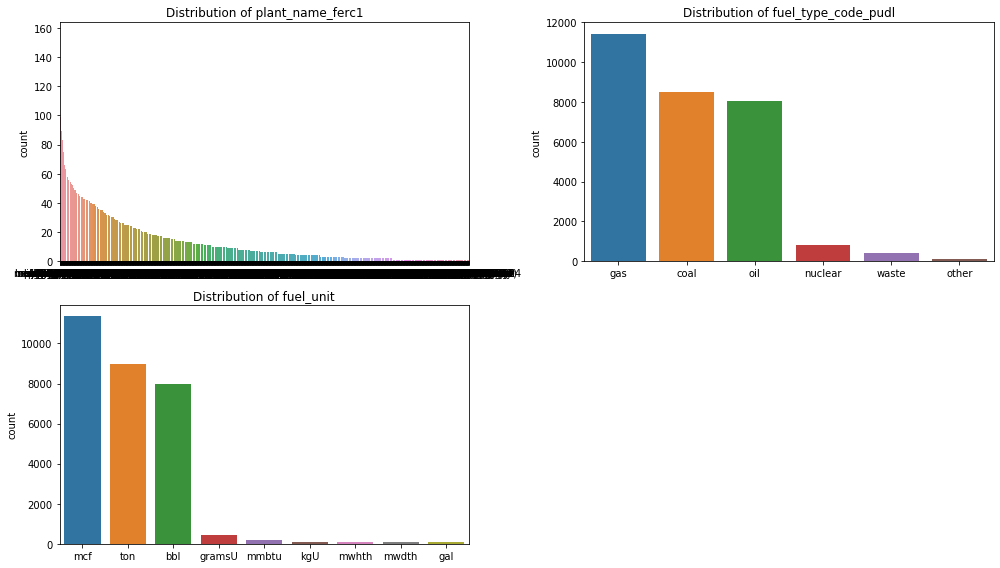

In [22]:
fig = plt.figure(1, (14, 8))

for i,cat in enumerate(data_cat):
    ax = plt.subplot(2,2,i+1)
    sns.countplot(data_cat[cat], order=data_cat[cat].value_counts().index)
    ax.set_xlabel(None)
    ax.set_title(f'Distribution of {cat}')
    plt.tight_layout()

plt.show()

In [23]:
for i,cat in enumerate(data_cat):
    val_counts = data_cat[cat].value_counts()
    dominant_frac = val_counts.iloc[0] / num_rows
    print(f'`{val_counts.index[0]}` alone contributes to {round(dominant_frac * 100, 2)}% of {cat}')

`big stone` alone contributes to 0.53% of plant_name_ferc1
`gas` alone contributes to 38.96% of fuel_type_code_pudl
`mcf` alone contributes to 38.69% of fuel_unit


In [24]:
data.groupby('plant_name_ferc1').size().sort_values(ascending=False)[:15]

plant_name_ferc1
big stone             156
four corners          151
riverside             133
coyote                121
louisa                119
hayden                 99
ben french station     93
lake road              92
oklaunion              90
independence           89
boardman               89
mcintosh               88
asheville              87
lee                    87
ottumwa                86
dtype: int64

In [25]:
data.groupby('fuel_type_code_pudl').size().sort_values(ascending=False)

fuel_type_code_pudl
gas        11433
coal        8496
oil         8043
nuclear      803
waste        437
other        131
dtype: int64

In [26]:
data.groupby('fuel_unit').size().sort_values(ascending=False)

fuel_unit
mcf       11354
ton        8958
bbl        7998
gramsU      464
mmbtu       180
kgU         110
mwhth       100
mwdth        95
gal          84
dtype: int64

### Insights
* `plant_name_ferc1` is highly balanced, `big_stone' consisting of 0.53% of data whereas `four corners` is having similar proportion. This shows us that there are equal distributions of plants used in our analysis.`
* `fuel_type_code_pudl` is quite imbalanced, `gas` alone consists of 38.96% of data. Whereas `coal` & `oil` are nearly in same proportion but `nuclear`,`waste` & `others` collectively accounts for very small proportions entries i.e.0.047% of entire data. We will see this huge proportional imbalance in `fuel_type` in future analysis, Obviously, The fuel type shows a reduced rate in the use of sustainable products .
* `fuel_unit` is also quite imbalanced, `mcf` alone consists of 38.69% of data while `ton` & `bbl` are also in the same proportion. This dominance is due the type of fuel used since each fuel type have the same units.


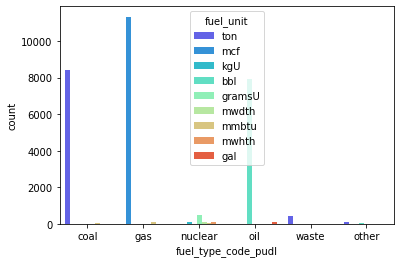

In [27]:
sns.countplot(data['fuel_type_code_pudl'], hue=data['fuel_unit'], palette='rainbow')
fig = plt.figure(1, (18, 8))

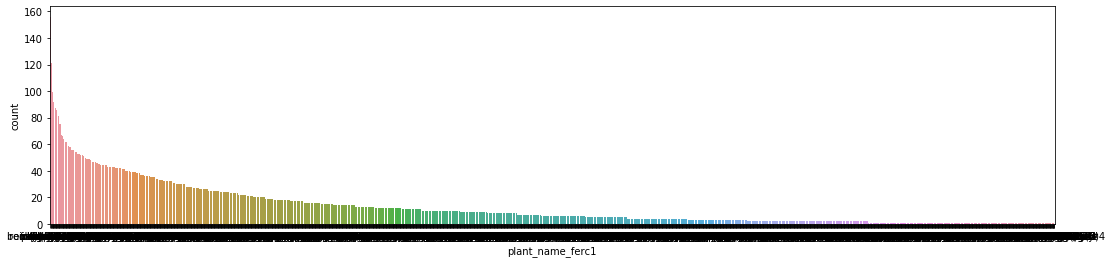

In [28]:
fig = plt.figure(1, (18, 4))

ax1 = plt.subplot(1,1,1)
sns.countplot(data['plant_name_ferc1'], order=data['plant_name_ferc1'].value_counts().index)


plt.show()

### Insights
* In the `fuel_type_code` we can see that `ton`is highly used for `coal`,  while `gas` uses `mcf`, nuclear partially uses`grams`, oil uses `bbl` and `ton` is often used for `waste` and `others` have very low usage
* We can also see that the usage of `mmbtu`,`mwdhth`,`gal`,`mwdth` is very small.
* This also confirms the `imbalance` in the `fuel type` and `fuel unit`
* The `plant_name` is `linearly distributed` throughout the graph this also confirm its `balanced usage` even though the count depriciates along the curve.


### Analysis on Numerical Attributes

Our analysis includes both descriptive stats and EDA.

In [29]:
print(f'numerical variables:  {nums}')

numerical variables:  ['utility_id_ferc1', 'report_year', 'fuel_qty_burned', 'fuel_mmbtu_per_unit', 'fuel_cost_per_unit_burned', 'fuel_cost_per_unit_delivered', 'fuel_cost_per_mmbtu']


In [30]:
num = ['utility_id_ferc1', 'fuel_qty_burned', 'fuel_mmbtu_per_unit', 'fuel_cost_per_unit_burned', 
       'fuel_cost_per_unit_delivered', 'fuel_cost_per_mmbtu']

In [31]:
data_num=data[nums]

In [32]:
data_num.head()

,utility_id_ferc1,report_year,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,1,1994,5377489.0,16.590,18.59,18.53,1.121
1,1,1994,10486945.0,16.592,18.58,18.53,1.120
2,2,1994,2978683.0,24.130,39.72,38.12,1.650
3,2,1994,3739484.0,23.950,47.21,45.99,1.970
4,2,1994,40533.0,1.000,2.77,2.77,2.570


In [33]:
df_num = data.loc[:, 'utility_id_ferc1':]

In [34]:
df_num=df_num.drop('report_year', axis=1)

In [35]:
df_num.describe()

,utility_id_ferc1,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
count,29343.000000,2.934300e+04,29343.000000,29343.000000,2.934300e+04,29343.000000
mean,118.507037,2.609171e+06,8.477481,209.756592,9.230343e+02,18.543975
std,74.241226,8.798699e+06,10.537478,2863.194789,6.898652e+04,2097.367750
min,1.000000,1.000000e+00,0.000001,-276.080000,-8.749370e+02,-41.501000
25%,55.000000,1.375050e+04,1.024000,5.230000,3.793000e+00,1.950000
50%,122.000000,2.524640e+05,5.763072,26.039000,1.749000e+01,4.140000
75%,176.000000,1.424218e+06,17.000000,47.172000,4.220850e+01,7.752000
max,514.000000,5.558942e+08,341.260000,139358.000000,7.964521e+06,359278.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001921070BB70>,
      dtype=object)

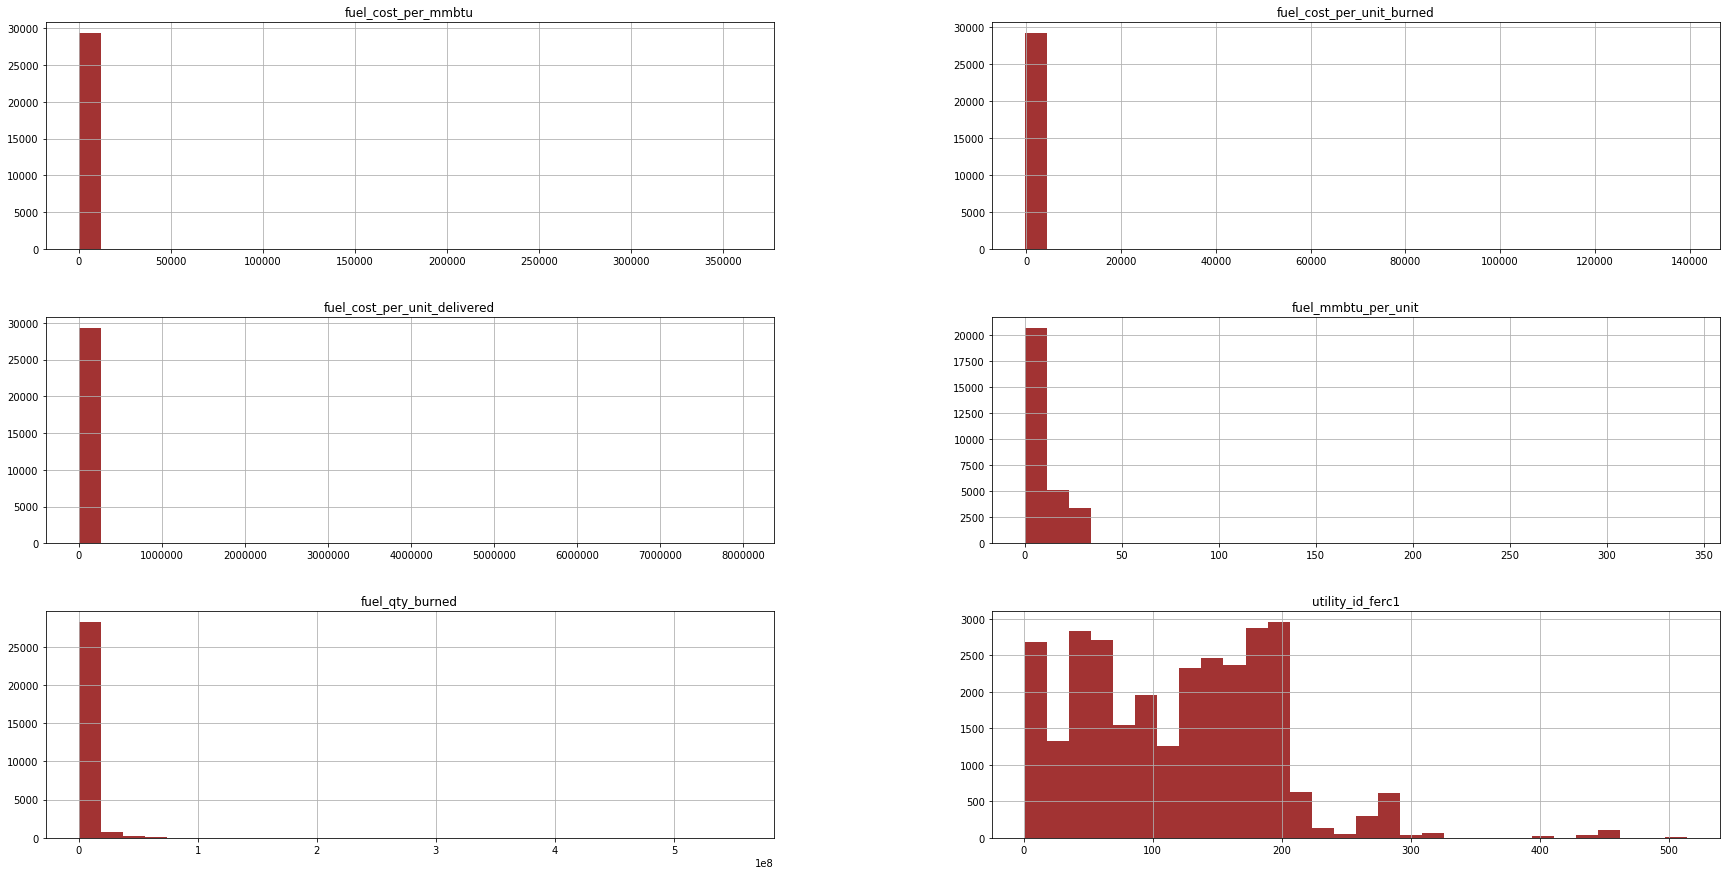

In [36]:
df_num.hist(color='darkred', bins=30, alpha=0.8,figsize=(30,15))

### Insights on histogram plot

* It can be seen that `fuel_qty_burned`,`fuel_measurement of energy_per_unit`,`fuel_cost_per_unit_burned`,`fuel_cost_per_unit_delivered`,`fuel_cost_per_measurement of energy` are not `normally distributed` and very much `skewed to the right`, hence we see very high quantities at the initial points and then very low at the other points, This might suggest that there are some outliers, our further analysis will show us.

* It can also be seen that the `utility Id assigned has better distribution` as compared to others.

### Analysis of Distribution
Now we analyse the distribution for each numerical attribute and make some insights from the plots.

In case of numerical variables an ideal (or atleast loved) distribution is `gaussian`, 

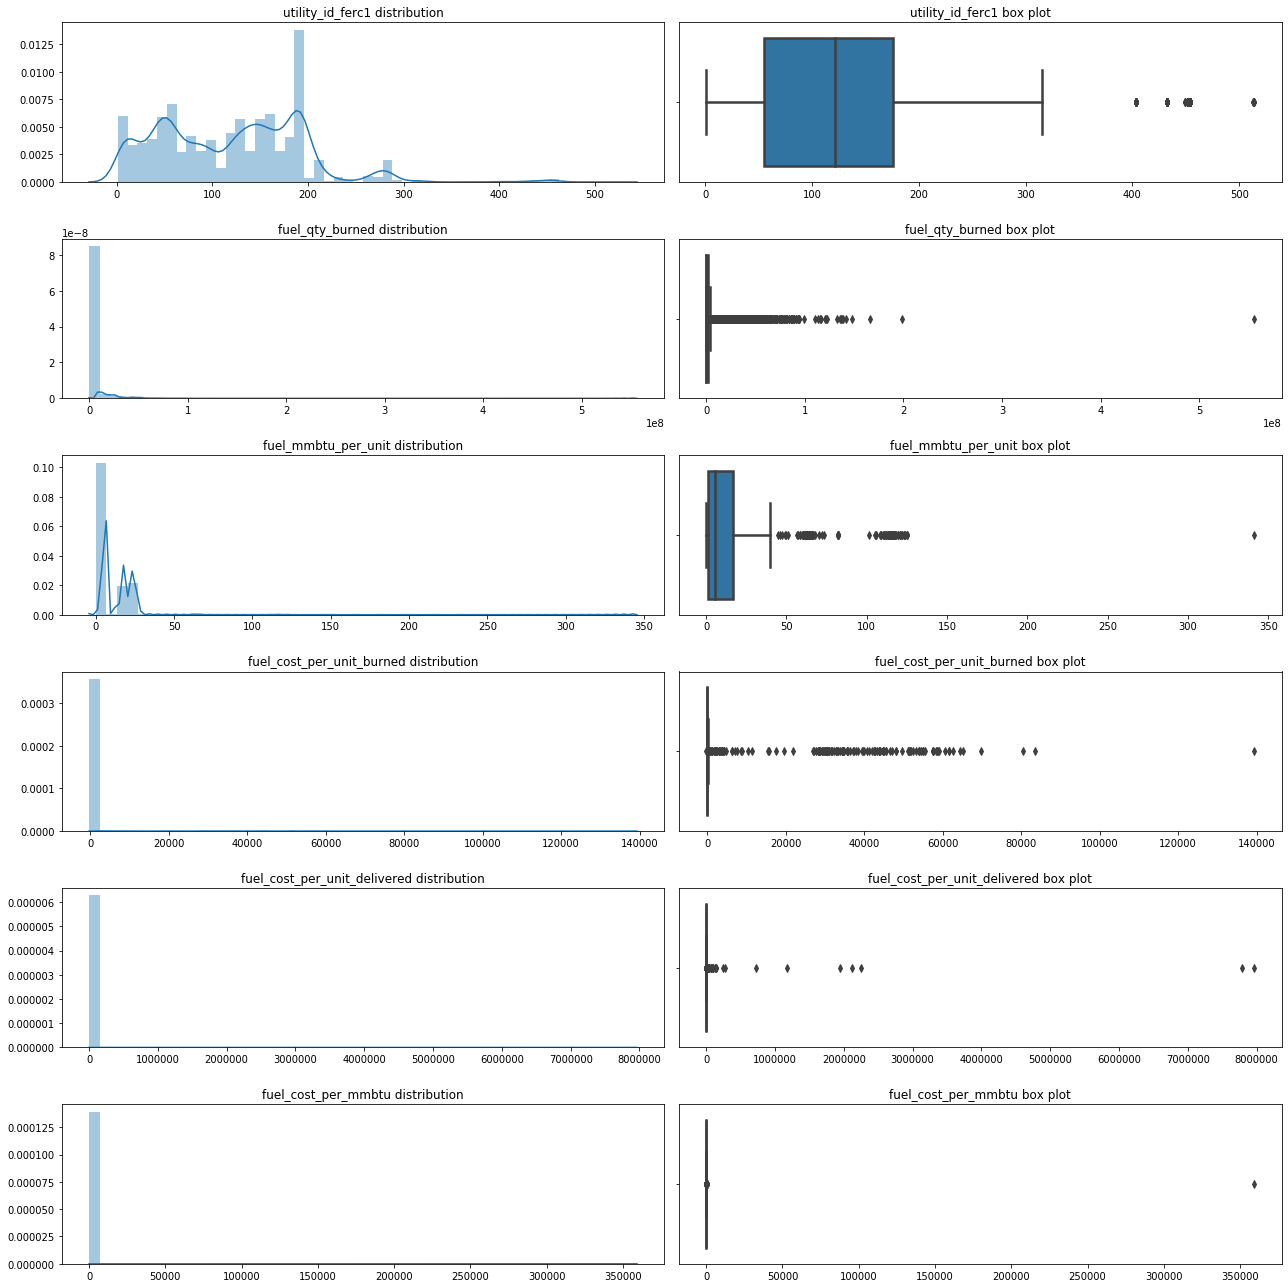

In [37]:
rows = len(num)
cols = 2

fig = plt.figure(1, (18, rows*3))

i = 0
for col in num:
    i += 1
    ax1 = plt.subplot(rows, cols,i)
#   ax1.hist(df[col], alpha=0.6)
    sns.distplot(df_num[col])
    ax1.set_xlabel(None)
    ax1.set_title(f'{col} distribution')
    plt.tight_layout()
    

    i += 1
    ax3 = plt.subplot(rows, cols,i)
    sns.boxplot(df_num[col], orient='h', linewidth=2.5)
    ax3.set_xlabel(None)
    ax3.set_title(f'{col} box plot')
    plt.tight_layout()

### Insights
* None of the numerical attributes is gaussian. 
* distributions of `utility_id_assigned` seem to be `right-skewed gaussian`.
* distributions of `fuel_qty_burned`,`fuel_measurement of energy_per_unit`,`fuel_cost_per_unit_burned`,
`fuel_cost_per_unit_delivered` & `fuel_cost_per_measurement of energy` seems to be far from gaussian.

    Let's analyse the outliers using tukey formula.

In [38]:
def tukey_outliers(x):
    q1 = np.percentile(x,25)
    q3 = np.percentile(x,75)
    
    iqr = q3-q1
    
    min_range = q1 - iqr*1.5
    max_range = q3 + iqr*1.5
    
    outliers = x[(x<min_range) | (x>max_range)]
    return outliers


In [40]:
for col in num:
    outliers = tukey_outliers(df_num[col])
    if len(outliers):
        print(f"* {col} has these tukey outliers,\n{outliers.head()}\n")
    else:
        print(f"* {col} doesn't have any tukey outliers.\n")

* utility_id_ferc1 has these tukey outliers,
17269    432
17270    432
17271    432
17272    432
18137    432
Name: utility_id_ferc1, dtype: int64

* fuel_qty_burned has these tukey outliers,
0      5377489.0
1     10486945.0
3      3739484.0
7      5372133.0
16     5327281.0
Name: fuel_qty_burned, dtype: float64

* fuel_mmbtu_per_unit has these tukey outliers,
92     61.800000
527    81.954941
656    81.912000
680    57.421958
681    66.634496
Name: fuel_mmbtu_per_unit, dtype: float64

* fuel_cost_per_unit_burned has these tukey outliers,
45     40803.000
150      122.508
223      291.220
224      262.810
252      139.711
Name: fuel_cost_per_unit_burned, dtype: float64

* fuel_cost_per_unit_delivered has these tukey outliers,
45     1550.000
150     122.508
413     154.648
445     321.336
447     309.851
Name: fuel_cost_per_unit_delivered, dtype: float64

* fuel_cost_per_mmbtu has these tukey outliers,
150    21.180
206    22.300
252    24.154
413    26.792
747    23.040
Name: fuel_co

In [41]:

outliers1= tukey_outliers(df_num.utility_id_ferc1).value_counts().sum()


outliers2=tukey_outliers(df_num.fuel_qty_burned).value_counts().sum()

outliers3=tukey_outliers(df_num.fuel_mmbtu_per_unit).value_counts().sum()

outliers4=tukey_outliers(df_num.fuel_cost_per_unit_burned).value_counts().sum()

outliers5=tukey_outliers(df_num.fuel_cost_per_unit_delivered).value_counts().sum()

outliers6=tukey_outliers(df_num.fuel_cost_per_mmbtu).value_counts().sum()
    
for col in num:
    outliers = tukey_outliers(df_num[col]).value_counts().sum()
    
    print(f"* {col} has these sum of tukey outliers,\n{outliers}\n")
    
    #print(outliers1,outliers2,outliers3,outliers4,outliers5,outliers6)

* utility_id_ferc1 has these sum of tukey outliers,
183

* fuel_qty_burned has these sum of tukey outliers,
3968

* fuel_mmbtu_per_unit has these sum of tukey outliers,
154

* fuel_cost_per_unit_burned has these sum of tukey outliers,
1886

* fuel_cost_per_unit_delivered has these sum of tukey outliers,
2109

* fuel_cost_per_mmbtu has these sum of tukey outliers,
2443



### Insights
* All the numerical attributes have outliers
* Outliers generally seems to be random nothing conclusive.
* Outliers in fuel_measurement of energy_per_unit, are seen to be the lowest 
* Outliers in fuel_cost_per_measurement of energy are seen to be the highest 
* They have to be correctly analysed so as not to have bias in our mean and mode

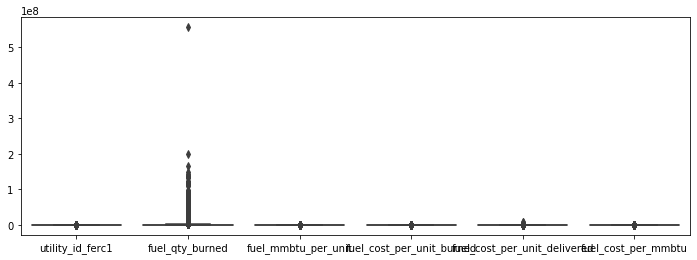

In [42]:
# see data is not scaled properly, we need to scale it for modelling but works fine for analysis.
fig = plt.figure(1, (12, 4))
ax = plt.subplot(1,1,1)
sns.boxplot(x="variable", y="value", data=pd.melt(df_num))
plt.xlabel(None)
plt.ylabel(None)
plt.show()

**Now we analyze relationship between different numerical attributes**

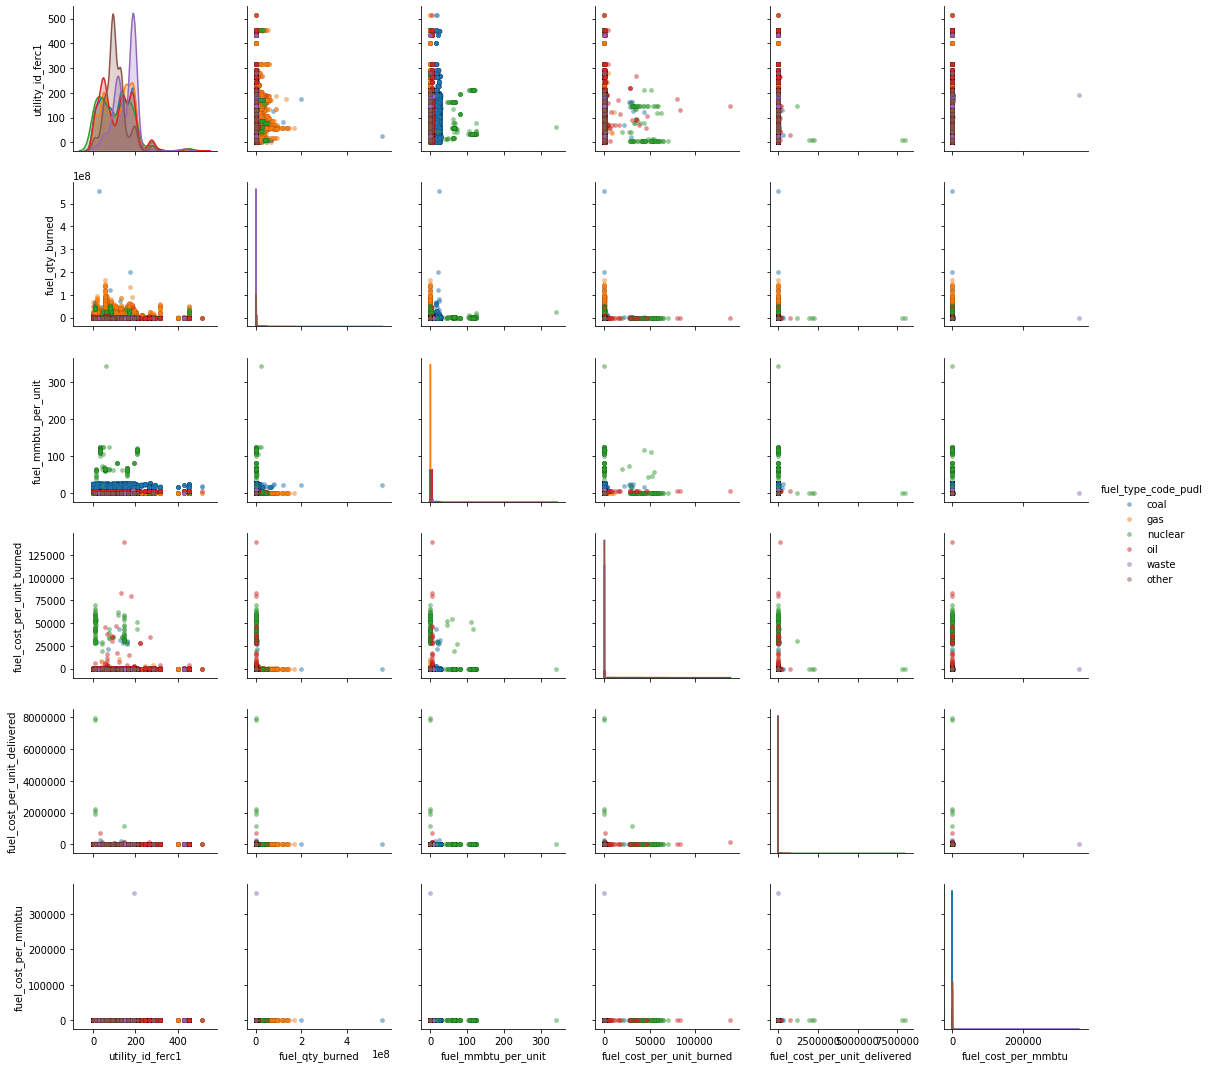

In [43]:
sns.pairplot(data=data, vars=num, diag_kind='kde', hue='fuel_type_code_pudl',
            plot_kws=dict(s=20, edgecolor="k", linewidth=0.1, alpha=0.5), diag_kws=dict(shade=True))
plt.show()

In [44]:
#correlation with variable of interest
dfnum_corr=df_num.corr()['fuel_qty_burned'][:-1]

In [45]:
dfnum_corr

utility_id_ferc1               -0.058025
fuel_qty_burned                 1.000000
fuel_mmbtu_per_unit            -0.082971
fuel_cost_per_unit_burned      -0.019147
fuel_cost_per_unit_delivered   -0.003671
Name: fuel_qty_burned, dtype: float64

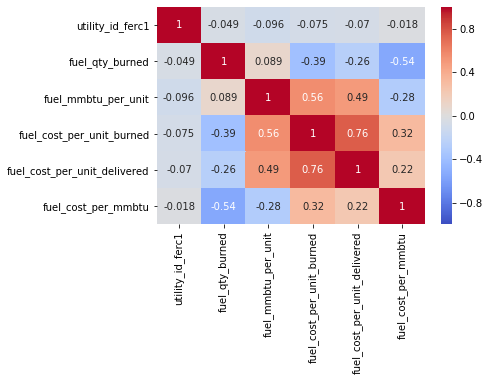

In [46]:
sns.heatmap(df_num.corr(method='spearman'), annot = True, vmin = -1, vmax = 1, center = 0, cmap = 'coolwarm')
plt.show()

### Insights
* as `utility_id assigned` increases all the other attributes decreases 
* as `fuel_quantity_burned` increases `fuel_measurement of energy_per_unit` increases 
* as `fuel_measurement of energy_per_unit` increases `utility_id_assigned` decreases.
* as `fuel_cost_per_unit_burned` increases `utility_id_assigned` and `fuel_qty_burned` decreases
* as `fuel_cost_per_unit_delivered` increseases `utility_id_assigned` and `fuel_qty_burned` decreases
* as` fuel_cost_per_measurement of energy` increases `utility_id_ferc1`, `fuel_qty_burned` and `fuel_measurement of energy_per_unit` decreases


**So all numerical attributes are related with each other.**

<Figure size 10800x8208 with 0 Axes>

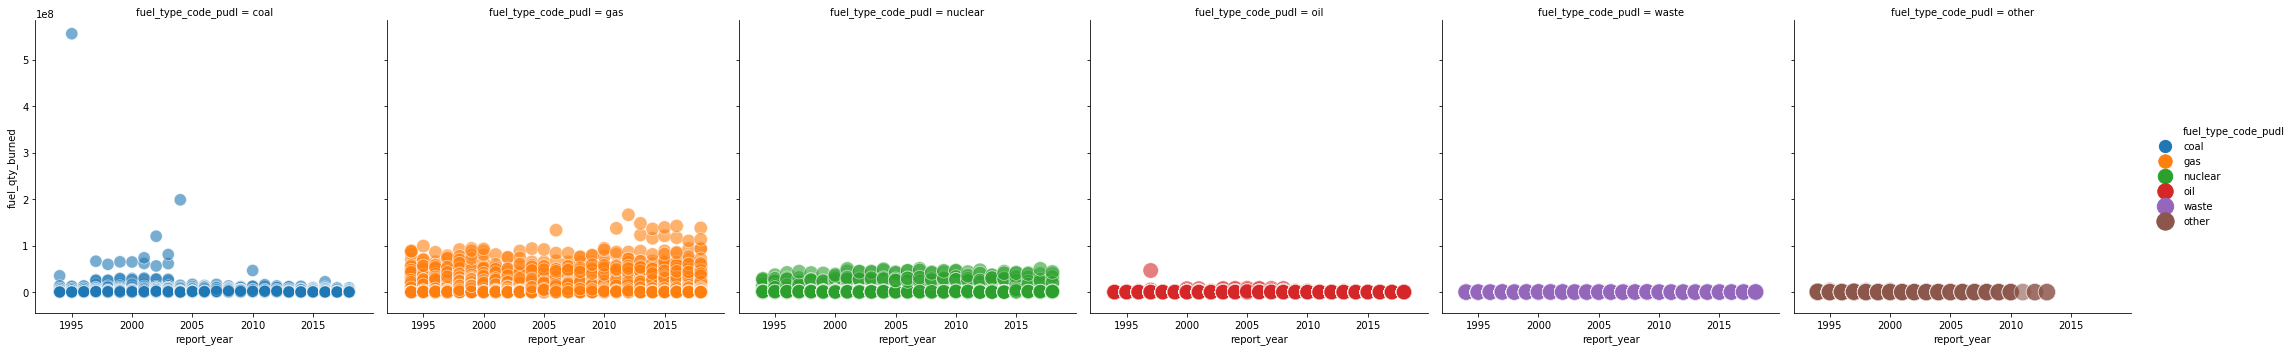

In [47]:
'''In this plot we analyze the relationship of report_year & fuel_qty_burned
bifurcated by fuel_type_code_pudl, fuel_type_code_pud,fuel_type_code_pudl in a single plot.'''
fig = plt.figure(1, (150, 114))



sns.relplot(x='report_year', y='fuel_qty_burned', hue='fuel_type_code_pudl', #style='mpg_level',
             size='fuel_type_code_pudl',col='fuel_type_code_pudl', data=data, kind='scatter', sizes=(300, 150), alpha=0.6)
plt.show()

### Insights
* There is a low production of coal as the year progresses
* There production of gas has a `high production` and there is a peak production between `2010` and `2015`
* There is `quite higher` production of nuclear energy as the year progresses
* oil, waste and other energy forms have a low production which are uniform throughout the years

variation of numerical features with fuel_type_code_pudl 


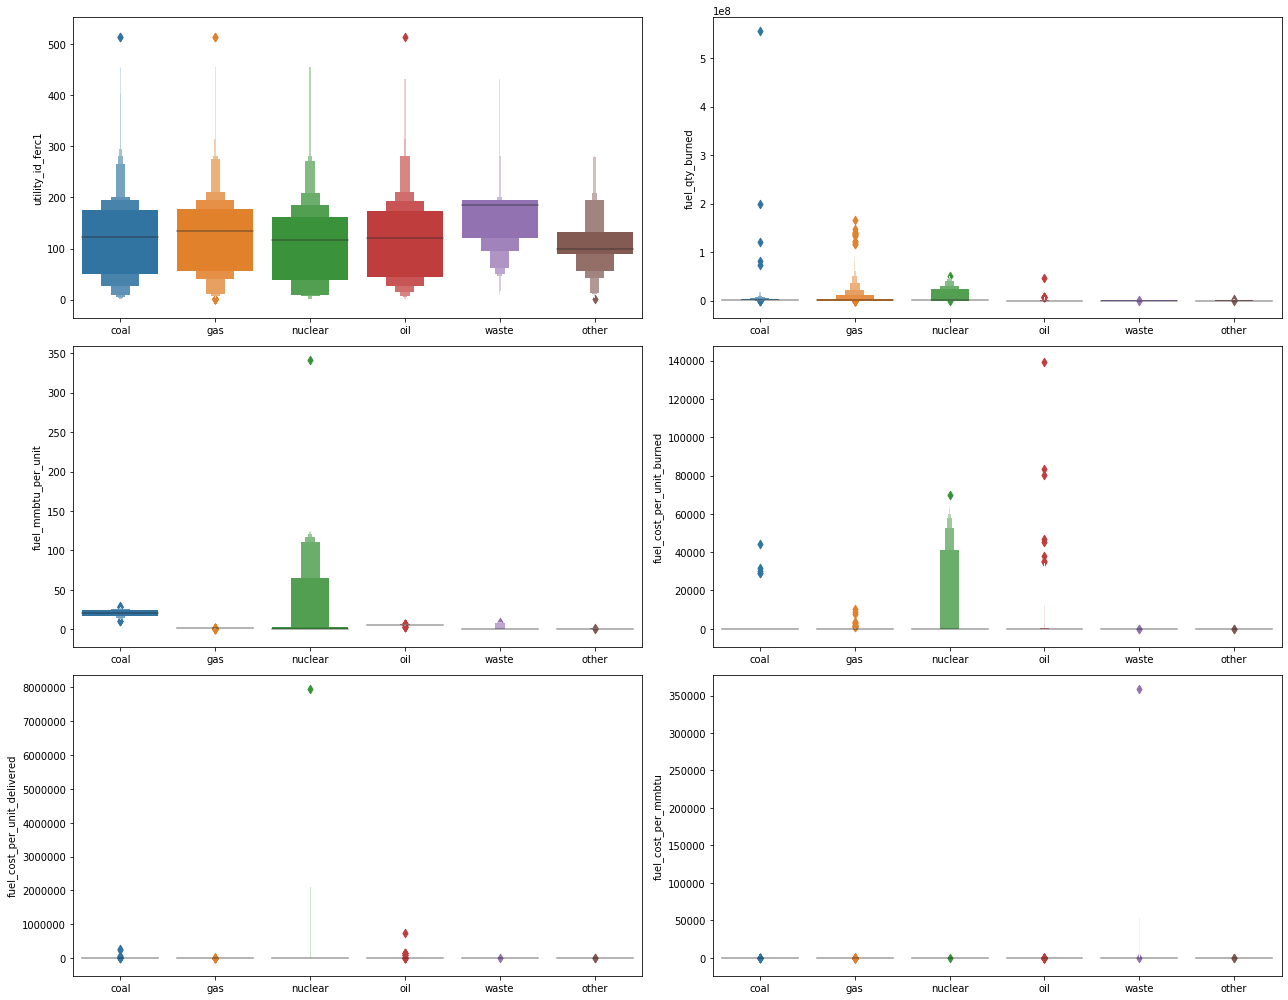

In [48]:
print('variation of numerical features with fuel_type_code_pudl ')

fig = plt.figure(1, (18, 14))

for idx,col in enumerate(num):
    ax = plt.subplot(3, 2, idx+1)
    sns.boxenplot(x='fuel_type_code_pudl', y=col, data=data)
    ax.set_xlabel(None)
    plt.tight_layout()

### Insights
* Other  energy forms has a `lower average utility I.d` assigned
* All forms of Energy have an average fuel burnt even though gas and `nuclear` has a ` higher variance`
* Coal has an higher average measure of energy per unit Even though `nuclear` has a `higher Variance`
* `Nuclear` haas a higher fuel cost per unit burned even though it is on the same `average line` as compared to others
* All the Energy forms have the same `fuel cost per unit burned`
* All the Energy forms have the same `fuel cost per measure of energy per unit`
* Coal and oil has has more outliers than others in `fuel cost per measure of energy per unit`

variation of numerical features with report_year


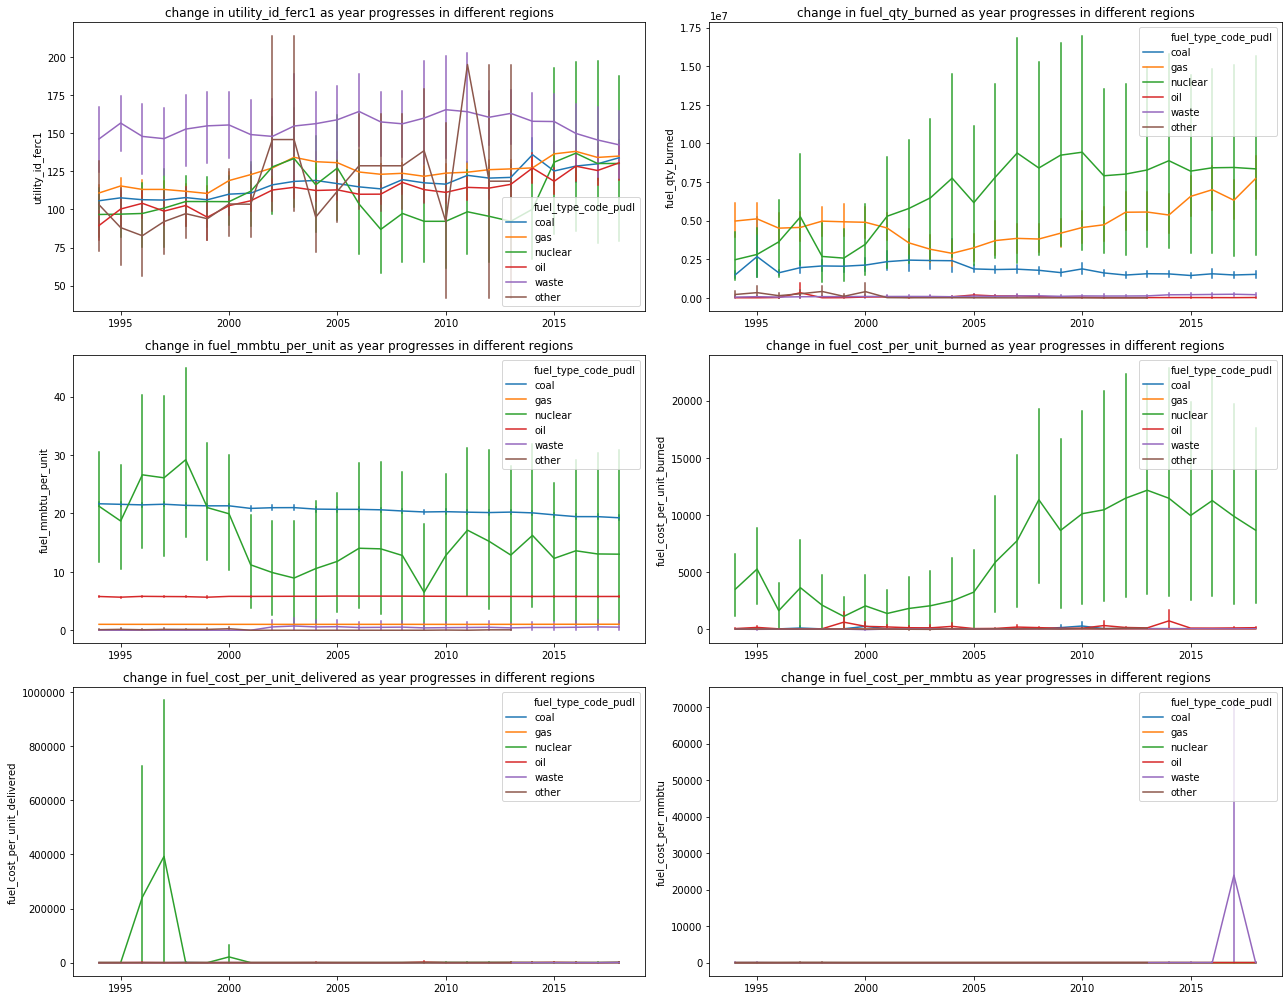

In [49]:
import sys
print('variation of numerical features with report_year')

fig = plt.figure(1, (18, 14))
# fig.tight_layout()

for idx,col in enumerate(num):
    
    ax = plt.subplot(3, 2, idx+1)
    sns.lineplot(x="report_year", y=col, hue='fuel_type_code_pudl',data=data, err_style='bars')
    ax.set_title(f'change in {col} as year progresses in different regions')
    ax.set_xlabel(None)
    plt.tight_layout()

### Insights
* nuclear Energy is really promising across the years since it has a higher production and usage rate
* other forms of Energy have somewhat low production and usage despite the fact that they have a higher rate of utility I.d assigned to them
* other forms of energy have a higher fuel cost per measurement of energy per unit assigned
* It is clearly obvious that coal,gas and nuclear energy has a high fuel burnt throughout the years even though waste an others are not clearly utilized, 


### Conclusion
* It is obvious that all the most sustainable energy forms are not seldomly used as compared to other energy sources, it can also be noted that the fuel production is somewhat higher across the years than its usage which is also not economical

* This visualization will make us to recommend an economical usage of the energy and a higher usage of more Sustainable Energy products.


**It will be pretty significant to do a normalization process and also perform feauture selection when trying to apply
a machine learning model to get a better prediction score, Even though all the numerical variables seems somewhat correlated**